**Import all required libraries**
===============================

In [1]:
import numpy as np
import pandas as pd 

**Load Train and Test data**
============================

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

X = train.drop(["label"], axis=1)
X = X.values.astype('int32')
print("loaded")

loaded


In [3]:
#reset
X = train.drop(["label"], axis=1)
X = X.values.astype('int32')

# clean data
print(X)
cut = 2#50
X[X <= cut] = 0
X[X > cut] = 1
print(X)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [4]:
# create model
X1 = np.split(X,2)[0]
X2 = np.split(X,2)[1]

y1 = np.split(train["label"],2)[0]
y2 = np.split(train["label"],2)[1]

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeClassifier()

model.fit(X2,y2) # easier to use 2 first than fix indexing

p = model.predict(X1)

total = 0
for i in range(200):
    if y1[i] == p[i]:
        total += 1

print(total/200) # print accuracy

0.855


Debug incorrect guesses to see what the model is not good at identifying

start


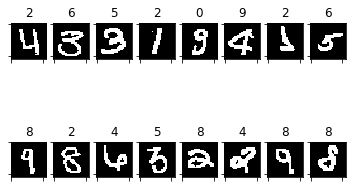

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

X_train = X
X_train = X_train.reshape(X_train.shape[0], 28, 28)

print('start')
fig, axes = plt.subplots(nrows=2, ncols=8)

I = 0
for ax in axes.flat[:]:
    for i in range(I+1, 500):
        if(p[i]) != train["label"][i]:
            I = i
            break
    ax.set_title(p[I]);
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))

**Export results**
============================

In [6]:
model.fit(X,train["label"])
predictions = model.predict(test)

submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)